### Use statistical methods (Z-score, IQR) and visualization to detect and handle outliers in a dataset (e.g., salaries, product prices). Compare model accuracy before and after handling outliers

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [3]:
# Generate synthetic salary dataset
np.random.seed(42)
experience = np.random.randint(1, 21, 200)
salary = experience * 2500 + np.random.normal(0, 4000, 200)

# Add some outliers
outlier_indices = np.random.choice(range(200), 5, replace=False)
salary[outlier_indices] = salary[outlier_indices] + np.random.randint(30000, 60000, 5)

data = pd.DataFrame({'Experience': experience, 'Salary': salary})
data.head()


,Experience,Salary
0,7,21050.046458
1,20,52421.932523
2,15,34618.808029
3,11,26420.264924
4,8,19426.151081


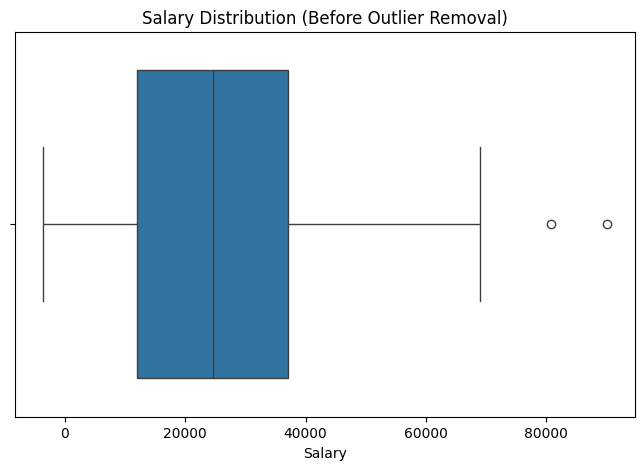

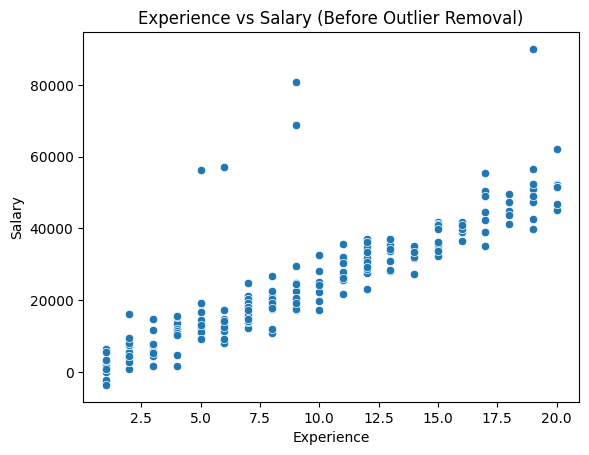

In [4]:
# Visualize salary distribution
plt.figure(figsize=(8,5))
sns.boxplot(x=data['Salary'])
plt.title("Salary Distribution (Before Outlier Removal)")
plt.show()

sns.scatterplot(x='Experience', y='Salary', data=data)
plt.title("Experience vs Salary (Before Outlier Removal)")
plt.show()


In [5]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(data['Salary']))
threshold = 3

# Remove outliers using Z-score
data_z_clean = data[z_scores < threshold]

print("Original dataset size:", len(data))
print("After Z-score filtering:", len(data_z_clean))


Original dataset size: 200
After Z-score filtering: 198


In [6]:
# Calculate IQR
Q1 = data['Salary'].quantile(0.25)
Q3 = data['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
data_iqr_clean = data[(data['Salary'] >= lower_bound) & (data['Salary'] <= upper_bound)]

print("After IQR filtering:", len(data_iqr_clean))


After IQR filtering: 198


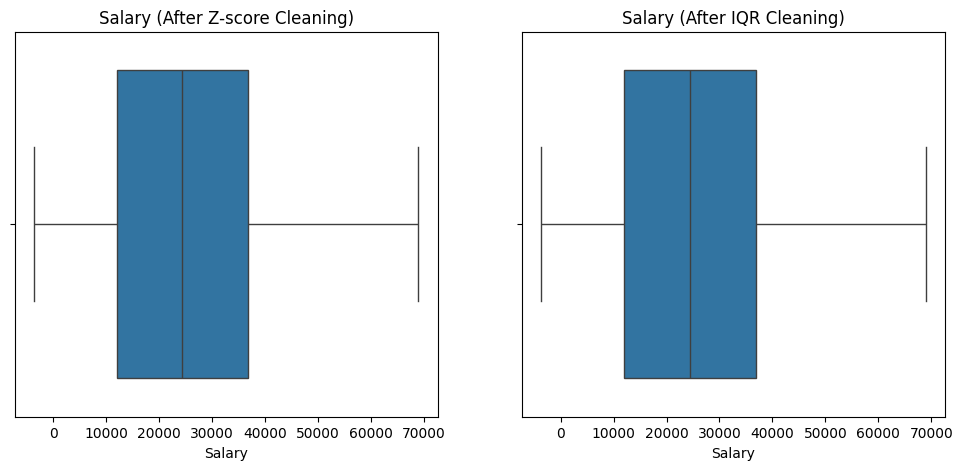

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.boxplot(x=data_z_clean['Salary'], ax=axes[0])
axes[0].set_title("Salary (After Z-score Cleaning)")

sns.boxplot(x=data_iqr_clean['Salary'], ax=axes[1])
axes[1].set_title("Salary (After IQR Cleaning)")

plt.show()


In [8]:
def evaluate_model(df, label):
    X = df[['Experience']]
    y = df['Salary']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"{label} - R² Score:", round(r2_score(y_test, y_pred), 4))
    return round(r2_score(y_test, y_pred), 4)

r2_original = evaluate_model(data, "Original Data")
r2_z = evaluate_model(data_z_clean, "After Z-score Cleaning")
r2_iqr = evaluate_model(data_iqr_clean, "After IQR Cleaning")


Original Data - R² Score: 0.9468
After Z-score Cleaning - R² Score: 0.9535
After IQR Cleaning - R² Score: 0.9535


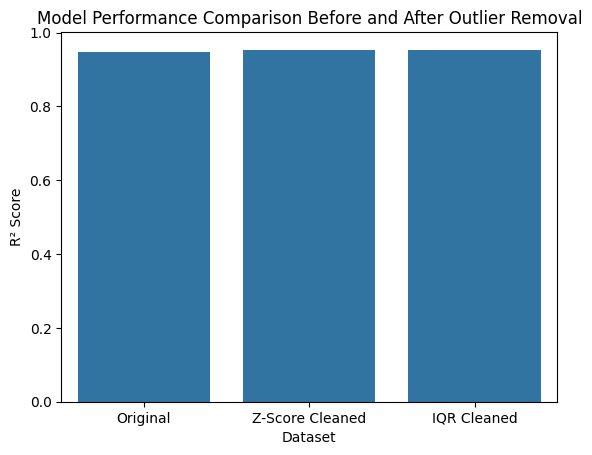

,Dataset,R² Score
0,Original,0.9468
1,Z-Score Cleaned,0.9535
2,IQR Cleaned,0.9535


In [9]:
results = pd.DataFrame({
    'Dataset': ['Original', 'Z-Score Cleaned', 'IQR Cleaned'],
    'R² Score': [r2_original, r2_z, r2_iqr]
})
sns.barplot(x='Dataset', y='R² Score', data=results)
plt.title("Model Performance Comparison Before and After Outlier Removal")
plt.show()

results
